# AVIATION DATASET ANALYSIS

## Introduction

Aviation accidents have been a major issue in the industry. As the team envisions to invest in the industry, understanding major issues related to  previous accidents is a step foward to ensuring a smart move into the industry. 

This analysis dives deep into these aspects

 A non- technical presentation for this analysis (here)[
 
 A tableau presentation is [here](https://public.tableau.com/app/profile/simon.irungu/viz/aviationdataanalysis/Dashboard1?publish=yes)

## Business Understanding

Determine the lowest risk aircraft for commercial and private use for a company. We want an aircraft that has a low risk and high efficiency. 

We will also determine the best engines for these aircrafts





## Data Understanding

This analysis uses the National Transportation Safety Board Dataset from 1962 to 2023 in the United States and  International Waters.

We majorly focus on the following columns:

- `Event.Date` Exact date when the event occured
- `Location` Where this accident occured
- `Weather.Condition`  The weather condition prior to the event
- `Engine.Type` The engine type of the plane in the accident

Among many other columns in the dataset

### Objectives
1. Identify location with most accidents
2. Identify accident rates in the recent years
3. Identify the purpose of flight that causes the most accidents
4. Calculate chances of survival in a plane crash
5. Effects of weather conditions on accidents
6. Engine types and accidents

### Importing modules

In [1]:
# Import relevant modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Import the data

In [4]:
df= pd.read_csv("AviationData.csv", encoding = 'latin1', low_memory = False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Filter relevant columns

In [6]:
df_columns = ['Event.Date', 'Country', 'Location', 'Injury.Severity', 'Model', 'Longitude', 'Latitude', 'Aircraft.damage', 'Make', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Aircraft.Category', 'Total.Uninjured', 'Weather.Condition']

In [7]:
df_columns

['Event.Date',
 'Country',
 'Location',
 'Injury.Severity',
 'Model',
 'Longitude',
 'Latitude',
 'Aircraft.damage',
 'Make',
 'Number.of.Engines',
 'Engine.Type',
 'Purpose.of.flight',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Aircraft.Category',
 'Total.Uninjured',
 'Weather.Condition']

In [11]:
# Filters the required columns
df_data= df[df_columns]
df_data.head()

,Event.Date,Country,Location,Injury.Severity,Model,Longitude,Latitude,Aircraft.damage,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Aircraft.Category,Total.Uninjured,Weather.Condition
0,1948-10-24,United States,"MOOSE CREEK, ID",Fatal(2),108-3,NaN,NaN,Destroyed,Stinson,1.0,Reciprocating,Personal,2.0,0.0,0.0,NaN,0.0,UNK
1,1962-07-19,United States,"BRIDGEPORT, CA",Fatal(4),PA24-180,NaN,NaN,Destroyed,Piper,1.0,Reciprocating,Personal,4.0,0.0,0.0,NaN,0.0,UNK
2,1974-08-30,United States,"Saltville, VA",Fatal(3),172M,-81.878056,36.922223,Destroyed,Cessna,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,NaN,IMC
3,1977-06-19,United States,"EUREKA, CA",Fatal(2),112,NaN,NaN,Destroyed,Rockwell,1.0,Reciprocating,Personal,2.0,0.0,0.0,NaN,0.0,IMC
4,1979-08-02,United States,"Canton, OH",Fatal(1),501,NaN,NaN,Destroyed,Cessna,NaN,NaN,Personal,1.0,2.0,NaN,NaN,0.0,VMC


### Data Cleaning

In [14]:
# Check for missing values
missing_val= df_data.isna().sum()
missing_val

Event.Date                    0
Country                     226
Location                     52
Injury.Severity            1000
Model                        92
Longitude                 54516
Latitude                  54507
Aircraft.damage            3194
Make                         63
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Aircraft.Category         56602
Total.Uninjured            5912
Weather.Condition          4492
dtype: int64

In [16]:
# Sort the values from the most to the least
missing_val.sort_values(ascending = False)

Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Injury.Severity            1000
Country                     226
Model                        92
Make                         63
Location                     52
Event.Date                    0
dtype: int64

### Aircraft Category has the most number of missing values, 56602, followed by Longitudes and Latitudes

In [19]:

missing =round( (df_data.isnull().sum().sum()/df_data.size)*100,2)
print(f"THere is {missing}% of missing values in the dataset")


THere is 14.74% of missing values in the dataset


### Missing values contribute to 14.7% of the data. This data is minute and can be dropped

In [22]:
# Drop all missing values
df_data = df_data.dropna().reset_index(drop=True)

In [24]:
df_data.head()

,Event.Date,Country,Location,Injury.Severity,Model,Longitude,Latitude,Aircraft.damage,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Aircraft.Category,Total.Uninjured,Weather.Condition
0,2001-06-03,United States,"LYTLE CREEK, CA",Fatal(1),PA-28-181,-117.539722,34.241389,Substantial,Piper,1.0,Reciprocating,Personal,1.0,0.0,0.0,Airplane,0.0,VMC
1,2003-06-21,United States,"Cushing, OK",Fatal(1),182H,-96.779167,35.935833,Destroyed,Cessna,1.0,Reciprocating,Skydiving,1.0,2.0,2.0,Airplane,1.0,VMC
2,2006-08-19,United States,"COLUMBUS, OH",Non-Fatal,369E,-82.968334,40.068889,Substantial,Mcdonnell Douglas Helicopters,1.0,Turbo Shaft,Public Aircraft - Local,0.0,0.0,0.0,Helicopter,2.0,VMC
3,2006-11-04,United States,"Yuba City, CA",Fatal(2),CH601XL SLSA,-121.626945,38.967778,Destroyed,Aircraft Mfg & Dev. Co. (amd),1.0,Reciprocating,Personal,2.0,0.0,0.0,Airplane,0.0,VMC
4,2006-12-07,United States,"Summersville, WV",Fatal(1),M20R,-80.976111,38.248611,Destroyed,Mooney,1.0,Reciprocating,Personal,1.0,0.0,0.0,Airplane,0.0,IMC


## Exploratory Data Analysis

### 1. Location with the most accidents

In [28]:
df_data['Location'].value_counts()

Location
Anchorage, AK           83
Palmer, AK              70
Talkeetna, AK           57
Phoenix, AZ             56
Fairbanks, AK           56
                        ..
Hernando, FL             1
Minas Gerias, Brazil     1
Mescalero, NM            1
Tallapoosa, GA           1
Dacula, GA               1
Name: count, Length: 7001, dtype: int64

In [30]:
top_10_loc = df_data['Location'].value_counts().head(10)
top_10_loc

Location
Anchorage, AK      83
Palmer, AK         70
Talkeetna, AK      57
Phoenix, AZ        56
Fairbanks, AK      56
Reno, NV           45
Houston, TX        43
San Antonio, TX    40
Oshkosh, WI        40
Las Vegas, NV      40
Name: count, dtype: int64

#### Let's visualize these values

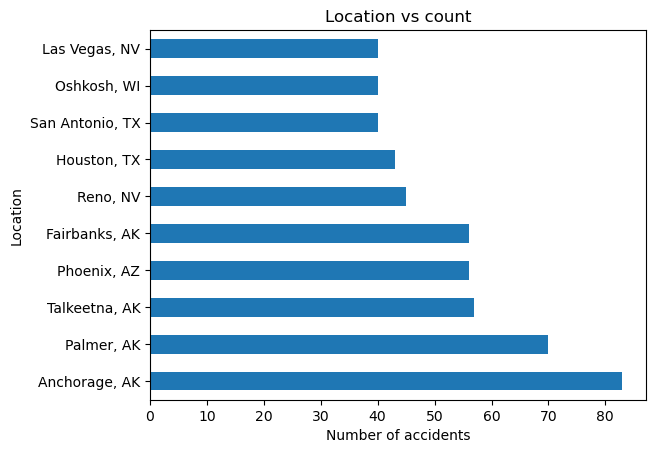

In [33]:
top_10_loc.plot(kind= 'barh')
plt.xlabel('Number of accidents')
plt.ylabel('Location')
plt.title('Location vs count')
plt.show()

#### ANCHORAGE,AK contributes to the most accidents with 434, followed by MIAMI,FL with 200 accidents in our selected dataset

## 2. Accident rates in the recent  years

In [37]:
# Change the event date column to pandas datetime
df_data['Event.Date'] = pd.to_datetime(df_data['Event.Date'])

In [39]:
df_data['Event.Date'].value_counts()

Event.Date
2011-07-23    16
2011-06-18    16
2010-05-29    15
2012-08-31    14
2011-03-19    14
              ..
2016-01-12     1
2016-01-11     1
2016-01-10     1
2016-01-09     1
2022-11-09     1
Name: count, Length: 4883, dtype: int64

Add another column for years. To identify each entry to a year

In [42]:
df_data['Year'] = df_data['Event.Date'].dt.year

In [44]:
df_data.head()

,Event.Date,Country,Location,Injury.Severity,Model,Longitude,Latitude,Aircraft.damage,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Aircraft.Category,Total.Uninjured,Weather.Condition,Year
0,2001-06-03,United States,"LYTLE CREEK, CA",Fatal(1),PA-28-181,-117.539722,34.241389,Substantial,Piper,1.0,Reciprocating,Personal,1.0,0.0,0.0,Airplane,0.0,VMC,2001
1,2003-06-21,United States,"Cushing, OK",Fatal(1),182H,-96.779167,35.935833,Destroyed,Cessna,1.0,Reciprocating,Skydiving,1.0,2.0,2.0,Airplane,1.0,VMC,2003
2,2006-08-19,United States,"COLUMBUS, OH",Non-Fatal,369E,-82.968334,40.068889,Substantial,Mcdonnell Douglas Helicopters,1.0,Turbo Shaft,Public Aircraft - Local,0.0,0.0,0.0,Helicopter,2.0,VMC,2006
3,2006-11-04,United States,"Yuba City, CA",Fatal(2),CH601XL SLSA,-121.626945,38.967778,Destroyed,Aircraft Mfg & Dev. Co. (amd),1.0,Reciprocating,Personal,2.0,0.0,0.0,Airplane,0.0,VMC,2006
4,2006-12-07,United States,"Summersville, WV",Fatal(1),M20R,-80.976111,38.248611,Destroyed,Mooney,1.0,Reciprocating,Personal,1.0,0.0,0.0,Airplane,0.0,IMC,2006


In [46]:
df_data['Year'].value_counts().sort_values(ascending= False)

Year
2008    1515
2009    1446
2012    1437
2011    1431
2010    1388
2016    1206
2018    1169
2017    1167
2013    1166
2015    1161
2014    1135
2019    1041
2020     727
2022     409
2021     316
2007      78
2006       3
2003       1
2001       1
Name: count, dtype: int64

In [48]:
# Group them by decade first
df_data['decade'] = (df_data['Year'] //10)*10
df_data

,Event.Date,Country,Location,Injury.Severity,Model,Longitude,Latitude,Aircraft.damage,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Aircraft.Category,Total.Uninjured,Weather.Condition,Year,decade
0,2001-06-03,United States,"LYTLE CREEK, CA",Fatal(1),PA-28-181,-117.539722,34.241389,Substantial,Piper,1.0,Reciprocating,Personal,1.0,0.0,0.0,Airplane,0.0,VMC,2001,2000
1,2003-06-21,United States,"Cushing, OK",Fatal(1),182H,-96.779167,35.935833,Destroyed,Cessna,1.0,Reciprocating,Skydiving,1.0,2.0,2.0,Airplane,1.0,VMC,2003,2000
2,2006-08-19,United States,"COLUMBUS, OH",Non-Fatal,369E,-82.968334,40.068889,Substantial,Mcdonnell Douglas Helicopters,1.0,Turbo Shaft,Public Aircraft - Local,0.0,0.0,0.0,Helicopter,2.0,VMC,2006,2000
3,2006-11-04,United States,"Yuba City, CA",Fatal(2),CH601XL SLSA,-121.626945,38.967778,Destroyed,Aircraft Mfg & Dev. Co. (amd),1.0,Reciprocating,Personal,2.0,0.0,0.0,Airplane,0.0,VMC,2006,2000
4,2006-12-07,United States,"Summersville, WV",Fatal(1),M20R,-80.976111,38.248611,Destroyed,Mooney,1.0,Reciprocating,Personal,1.0,0.0,0.0,Airplane,0.0,IMC,2006,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16792,2022-10-06,United States,"Iola, TX",Non-Fatal,150,0096752W,304354N,Substantial,CESSNA,1.0,Reciprocating,Personal,0.0,0.0,0.0,Airplane,1.0,VMC,2022,2020
16793,2022-10-08,United States,"Dacula, GA",Non-Fatal,177RG,0835224W,034055N,Substantial,CESSNA,1.0,Reciprocating,Personal,0.0,0.0,0.0,Airplane,2.0,VMC,2022,2020
16794,2022-10-13,United States,"Ardmore, OK",Non-Fatal,B-60,0097722W,034849N,Substantial,BEECH,2.0,Reciprocating,Personal,0.0,0.0,0.0,Airplane,1.0,VMC,2022,2020
16795,2022-10-29,United States,"Houston, TX",Minor,MS-500,0095959W,293620N,Substantial,STEPHEN J HOFFMAN,1.0,Reciprocating,ASHO,0.0,1.0,0.0,Airplane,0.0,VMC,2022,2020


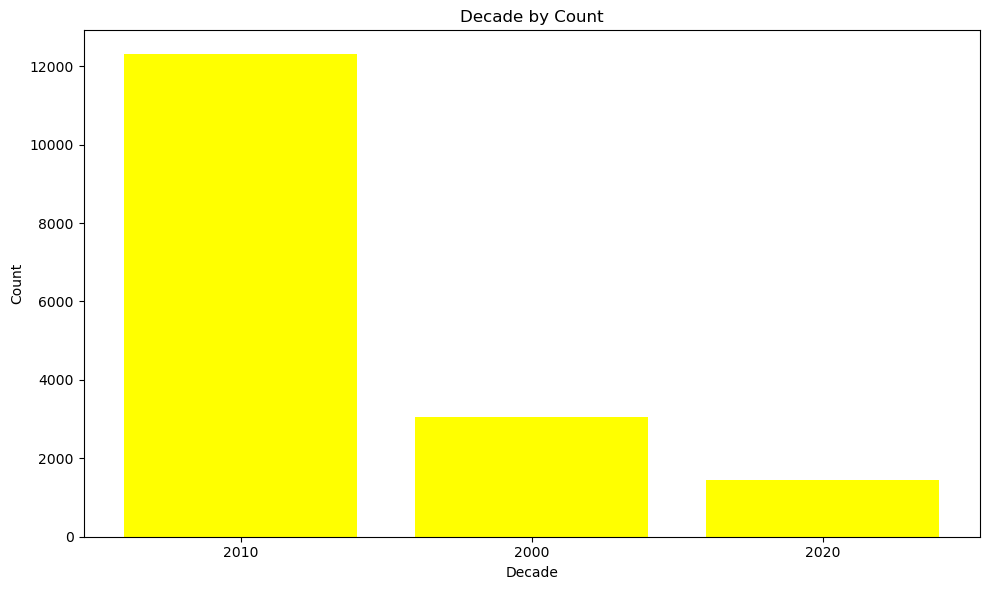

In [50]:
decade_count= df_data['decade'].value_counts()
plt.figure(figsize= (10,6))
plt.bar(decade_count.index.astype(str), decade_count.values, color = 'yellow')
plt.title('Decade by Count')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [52]:
df_data['decade'].value_counts()

decade
2010    12301
2000     3044
2020     1452
Name: count, dtype: int64

#### The 2010's had the most number of accidents, with 12,301 accidents, followed by the 2000's with 3044 accidents. The 1970's, 40's and 60's had the least number of accidents
#### This high rate of accidents in the 80's and 90's can be related to the high usage of air transport in these years. in the early 1940's, 60's and 70's, air was not used as a means of transport, thus chances for an  accident were very low

### 3. Purpose of flight that caused the most accidents

In [56]:
top_10_flightpurp = df_data['Purpose.of.flight'].value_counts(ascending =False).head(10)
top_10_flightpurp

Purpose.of.flight
Personal              11354
Instructional          2400
Aerial Application      869
Business                406
Positioning             352
Other Work Use          226
Aerial Observation      219
Flight Test             203
Skydiving                96
Ferry                    89
Name: count, dtype: int64

In [58]:
df_data['Purpose.of.flight'].value_counts().sum()

16797

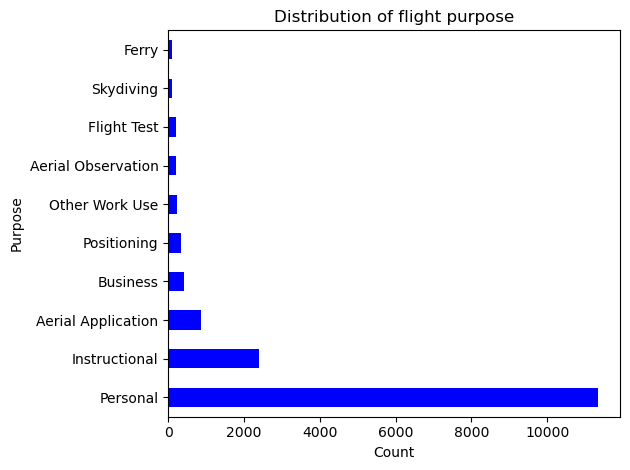

In [60]:
top_10_flightpurp.plot(kind= 'barh', color = 'blue')
plt.title('Distribution of flight purpose')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.tight_layout()
plt.show()

#### Aircrafts flying for personal reasons contribute to 60% of the total accidents. Those flying for instructional reasons contribute to 12%

### 4. Chances of Survival in a plane crash

In [64]:
# Create another column for survival rate
df_data['Survival'] = (df_data['Total.Serious.Injuries'] + df_data['Total.Minor.Injuries'] + df_data['Total.Uninjured'])/ (df_data['Total.Fatal.Injuries'] + df_data['Total.Serious.Injuries'] + df_data['Total.Minor.Injuries'] + df_data['Total.Uninjured'])

In [66]:
df_data['Survival_rate'] = round(df_data['Survival']*100,2)

In [68]:
df_data

,Event.Date,Country,Location,Injury.Severity,Model,Longitude,Latitude,Aircraft.damage,Make,Number.of.Engines,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Aircraft.Category,Total.Uninjured,Weather.Condition,Year,decade,Survival,Survival_rate
0,2001-06-03,United States,"LYTLE CREEK, CA",Fatal(1),PA-28-181,-117.539722,34.241389,Substantial,Piper,1.0,...,1.0,0.0,0.0,Airplane,0.0,VMC,2001,2000,0.000000,0.00
1,2003-06-21,United States,"Cushing, OK",Fatal(1),182H,-96.779167,35.935833,Destroyed,Cessna,1.0,...,1.0,2.0,2.0,Airplane,1.0,VMC,2003,2000,0.833333,83.33
2,2006-08-19,United States,"COLUMBUS, OH",Non-Fatal,369E,-82.968334,40.068889,Substantial,Mcdonnell Douglas Helicopters,1.0,...,0.0,0.0,0.0,Helicopter,2.0,VMC,2006,2000,1.000000,100.00
3,2006-11-04,United States,"Yuba City, CA",Fatal(2),CH601XL SLSA,-121.626945,38.967778,Destroyed,Aircraft Mfg & Dev. Co. (amd),1.0,...,2.0,0.0,0.0,Airplane,0.0,VMC,2006,2000,0.000000,0.00
4,2006-12-07,United States,"Summersville, WV",Fatal(1),M20R,-80.976111,38.248611,Destroyed,Mooney,1.0,...,1.0,0.0,0.0,Airplane,0.0,IMC,2006,2000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16792,2022-10-06,United States,"Iola, TX",Non-Fatal,150,0096752W,304354N,Substantial,CESSNA,1.0,...,0.0,0.0,0.0,Airplane,1.0,VMC,2022,2020,1.000000,100.00
16793,2022-10-08,United States,"Dacula, GA",Non-Fatal,177RG,0835224W,034055N,Substantial,CESSNA,1.0,...,0.0,0.0,0.0,Airplane,2.0,VMC,2022,2020,1.000000,100.00
16794,2022-10-13,United States,"Ardmore, OK",Non-Fatal,B-60,0097722W,034849N,Substantial,BEECH,2.0,...,0.0,0.0,0.0,Airplane,1.0,VMC,2022,2020,1.000000,100.00
16795,2022-10-29,United States,"Houston, TX",Minor,MS-500,0095959W,293620N,Substantial,STEPHEN J HOFFMAN,1.0,...,0.0,1.0,0.0,Airplane,0.0,VMC,2022,2020,1.000000,100.00


In [70]:
df_data['Survival_rate'].value_counts()

Survival_rate
100.00    13944
0.00       2424
50.00       253
66.67        49
33.33        37
25.00        18
75.00        18
20.00         9
80.00         7
60.00         5
16.67         5
40.00         3
92.31         2
83.33         2
85.71         2
71.43         2
28.57         2
44.44         1
70.00         1
90.91         1
46.15         1
Name: count, dtype: int64

#### It shows a thin line between survival and death. In most plane crashes, either everyone dies, or everyone stays alive. 

### 5. Effects of weather conditions on accidents


In [74]:
avg_weather_cond= df_data['Weather.Condition'].value_counts(normalize = True)*100
print(round(avg_weather_cond,2))

Weather.Condition
VMC    95.43
IMC     4.20
Unk     0.36
Name: proportion, dtype: float64


### VMC (VIsual Meteorological Conditions)

This means the pilot does not rely on the instruments for navigation. 

Weather conditions are perfect

Contributes to 95.43% of the total Dataset.

### IMC (Instrument Meteorological Conditions)

Weather conditions rely on the pilot to use instruments for navigation

Contributes to 4% of all the accidents

### Unk (Unknown)

Weather conditions were not reported, or they were unknown

These were uncertain observations

Contributes to less than 1% of the data


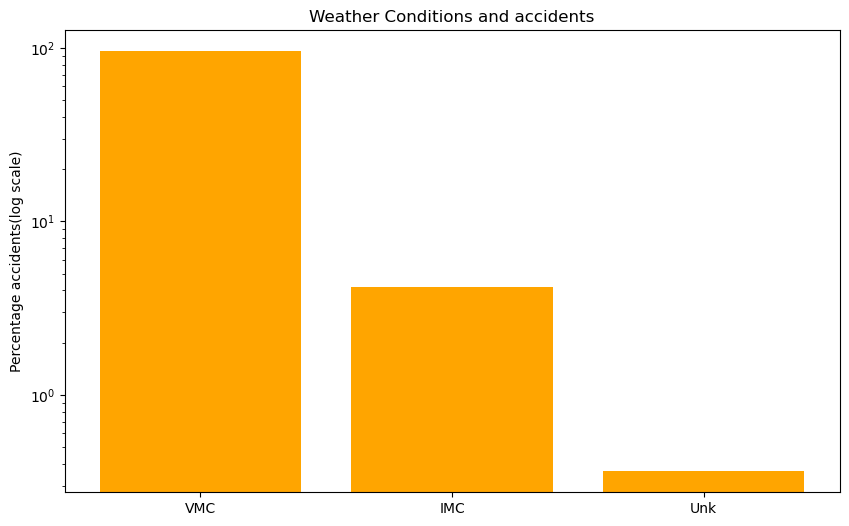

In [77]:
plt.figure (figsize = (10,6))
plt.bar(avg_weather_cond.index,avg_weather_cond.values,  color = 'orange')
plt.yscale('log')
plt.ylabel('Percentage accidents(log scale)')
plt.title('Weather Conditions and accidents')
plt.show()

#### This visualization shows that weather conditions have little effects on accidents, since many accidents happened on perfect weather conditions, VMC. However, This may me contrary to our observations where we saw that many accidents happen in Alaska airports. 

### 6. Effeect of engine types on accidents

In [81]:
engine_type = df_data['Engine.Type'].value_counts()
engine_type

Engine.Type
Reciprocating    15049
Turbo Prop         788
Turbo Shaft        712
Turbo Fan          158
Turbo Jet           64
Unknown             16
Electric             6
NONE                 2
LR                   1
UNK                  1
Name: count, dtype: int64

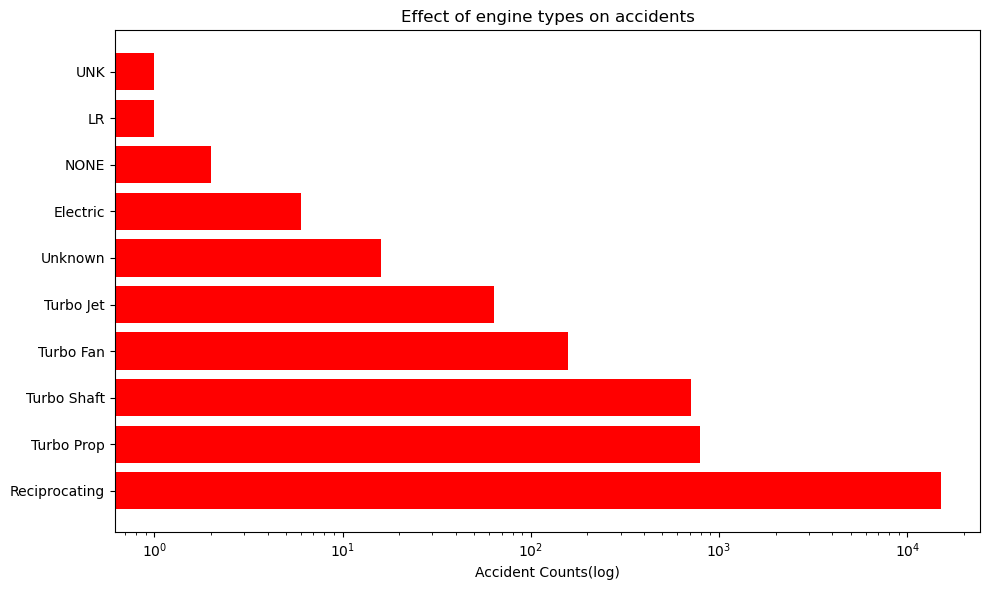

In [83]:
plt.figure(figsize=(10,6))
bars = plt.barh(engine_type.index, engine_type.values, color ='red')
plt.xscale('log')
plt.xlabel('Accident Counts(log)')
plt.title('Effect of engine types on accidents')
plt.tight_layout()
plt.show()
           

In [84]:
df_data.to_excel('Aviation_cleaned.xlsx', index = False)

#### Most aircrafts that are involved in accidents have the reciprocating engine. However it should be noted that reciprocating engine is also a very popular engine. LR is the least prone to accidents

## Findings


- Locations like Anchorage in Alaska and Palmer in alaska are nototrious for being locations for most accidents
- Accidents are decreasing with time,with a percentage decrease of 64%. Safety measures are being implemented to protect passengers.
- Weather conditions have no general effect on accidents because most accidents happen on perfect weather conditions
- The reciprocating engine has caused alot of accidents, followed by Turbo prop. Engines like LR have few contribution to accidents
- There is a thin line between life and death in a plane crash. survival rate is also low

## Recommendations

- Avoid placing aircrafts in locations like Alaska. They are prone to accidents
- Avoid the reciprocating engine.
- Concider purchasing engines like electric and LR for the aircrafts. They are safer
- Have passenger insurance for planes as accidents are very deadly
- air travel is becoming pupular and safer. Investing now promises a bright future 

## Conclussion
With safety measures put foward for human life protection, plane crashes are highly reduced. This is an indicator that high profits are bound to be generated from the industry. In conclussion, this business should have confidence in investing money in the aviation business